In [6]:
import pandas as pd

In [2]:
print(pd.__version__)

2.0.3


In [3]:
# pandas series: a column in a table
a=[1,2,3]
s=pd.Series(a)
print(s)

0    1
1    2
2    3
dtype: int64


In [5]:
# Labels are the index of series: here s[0]: 0 is the label
print(s[0])

1


In [7]:
# label creation:
sl=pd.Series(a,index=['x','y','z'])
print(sl)

x    1
y    2
z    3
dtype: int64


In [8]:
print(sl['y']) # Here y is the label

2


In [9]:
# Dictinary as a series
example={
    'Day 1':420,
    'Day 2':310,
    'Day 3':357
}
ex=pd.Series(example)
print(ex)

Day 1    420
Day 2    310
Day 3    357
dtype: int64


In [10]:
# to select some specific values in series, mention their index number in index
ex1=pd.Series(example,index=['Day 1','Day 2'])
print(ex1)

Day 1    420
Day 2    310
dtype: int64


In [11]:
dataset={
    'cars':['Tata','BMW','Mahindra','Volvo','Ford','Ferrari','Hyundai','Honda',None,'Suzuki'],
    'ratings':[5,4.7,4.5,5,4,4,3,3.5,3.7,2.5]
}

In [12]:
# To convert into data frame
# df=pandas.DataFrame(dataset)
df=pd.DataFrame(dataset)
print(df)

       cars  ratings
0      Tata      5.0
1       BMW      4.7
2  Mahindra      4.5
3     Volvo      5.0
4      Ford      4.0
5   Ferrari      4.0
6   Hyundai      3.0
7     Honda      3.5
8      None      3.7
9    Suzuki      2.5


In [13]:
print(df.loc[0]) # The result is pandas series

cars       Tata
ratings     5.0
Name: 0, dtype: object


In [14]:
print(df.loc[[0,1]]) # for more locations result will be DF

   cars  ratings
0  Tata      5.0
1   BMW      4.7


In [3]:
csv_df=pd.read_csv('./data.csv')
print(csv_df) # gives first and last five rows of enntire data

NameError: name 'pd' is not defined

In [16]:
print(csv_df.to_string()) # to prit entire data Frame

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
5          60    102       127     300.0
6          60    110       136     374.0
7          45    104       134     253.3
8          30    109       133     195.1
9          60     98       124     269.0
10         60    103       147     329.3
11         60    100       120     250.7
12         60    106       128     345.3
13         60    104       132     379.3
14         60     98       123     275.0
15         60     98       120     215.2
16         60    100       120     300.0
17         45     90       112       NaN
18         60    103       123     323.0
19         45     97       125     243.0
20         60    108       131     364.2
21         45    100       119     282.0
22         60    130       101     300.0
23         45   

In [18]:
print(pd.options.display.max_rows) # 60 : if my dataframe has more than 60 records then it will print top 5 and bottom 5 rows only
# pd.options.display.max_rows=999 # We can change the max rows by this line

60


In [19]:
print(csv_df.head(10))

   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0
5        60    102       127     300.0
6        60    110       136     374.0
7        45    104       134     253.3
8        30    109       133     195.1
9        60     98       124     269.0


In [20]:
print(csv_df.tail(10))

     Duration  Pulse  Maxpulse  Calories
159        30     80       120     240.9
160        30     85       120     250.4
161        45     90       130     260.4
162        45     95       130     270.0
163        45    100       140     280.9
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4


In [21]:
print(csv_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB
None


In [22]:
# Data cleaning
# 1. Drop null values
dropped_csv_df=csv_df.dropna() # By default it returns new Dataframe use 'inplace=True' to change original dataframe
print(dropped_csv_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  164 non-null    int64  
 1   Pulse     164 non-null    int64  
 2   Maxpulse  164 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.4 KB
None


In [24]:
# 2. Replace the null values with new one
csv_df.fillna({'Calories':130},inplace=True) # If we do not mention col name then it will replace all the null values with mentioned one
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  169 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [28]:
# replace with mean,median,mode
x=csv_df['Calories'].mean()
print(x)

375.79024390243904


In [30]:
csv_df.fillna({'Calories':x},inplace=True)
csv_df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [31]:
csv_df['Calories'].median()

321.0

In [34]:
csv_df['Calories'].mode()

0    300.0
Name: Calories, dtype: float64

In [35]:
csv_df['Calories'].mode()[0]

300.0

In [38]:
# To check wrong format data and clean it:
samData={
    'name':['A','B','C','D','E','F','G','H','I','J','K','L','M'],
    'date':['2026-01-01','2026-01-01','2026-01-01','2026-01-01','','2026-01-01','2026-01-01','2026-01-01','2026-01-01','20260101','','2026-01-01','']
}
dtdf=pd.DataFrame(samData)

In [39]:
dtdf

,name,date
0,A,2026-01-01
1,B,2026-01-01
2,C,2026-01-01
3,D,2026-01-01
4,E,
5,F,2026-01-01
6,G,2026-01-01
7,H,2026-01-01
8,I,2026-01-01
9,J,20260101


In [40]:
# 1. to clean date format: null, incorrectly formatted date
dtdf['date']=pd.to_datetime(dtdf['date'],errors="coerce")

In [42]:
# Format has got changed, for null values we will check for NaT
dtdf

,name,date
0,A,2026-01-01
1,B,2026-01-01
2,C,2026-01-01
3,D,2026-01-01
4,E,NaT
5,F,2026-01-01
6,G,2026-01-01
7,H,2026-01-01
8,I,2026-01-01
9,J,NaT


In [48]:
dtdf[dtdf['date'].isna()]
# These are null values

,name,date
4,E,NaT
9,J,NaT
10,K,NaT
12,M,NaT


In [56]:
dtdf.dropna(subset=['date'],inplace=True)

In [58]:
dtdf
# Here is the cleaned version of date

,name,date
0,A,2026-01-01
1,B,2026-01-01
2,C,2026-01-01
3,D,2026-01-01
5,F,2026-01-01
6,G,2026-01-01
7,H,2026-01-01
8,I,2026-01-01
11,L,2026-01-01


In [80]:
# Practice:
data = {
    "id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "name": ["Amit", "Riya", "John", "Sara", "Mike", "Neha", "Tom", "Anil", "Eva", "Raj"],
    
    # Mixed date formats + nulls + invalid values
    "join_date": [
        "2024-01-15",     # valid ISO
        "15/02/2024",     # different format
        None,             # null
        "2024/03/20",     # wrong separator
        "2024-13-01",     # invalid month
        "2024-02-30",     # invalid day
        "March 10, 2024", # text format
        "",               # empty string
        "20240125",       # no separators
        "abc"             # garbage value
    ]
}
df2=pd.DataFrame(data)

In [81]:
df2

,id,name,join_date
0,1,Amit,2024-01-15
1,2,Riya,15/02/2024
2,3,John,None
3,4,Sara,2024/03/20
4,5,Mike,2024-13-01
5,6,Neha,2024-02-30
6,7,Tom,"March 10, 2024"
7,8,Anil,
8,9,Eva,20240125
9,10,Raj,abc


In [83]:
df2['join_date']=pd.to_datetime(df2['join_date'],format='mixed',errors='coerce')

In [84]:
df2

,id,name,join_date
0,1,Amit,2024-01-15
1,2,Riya,2024-02-15
2,3,John,NaT
3,4,Sara,2024-03-20
4,5,Mike,NaT
5,6,Neha,NaT
6,7,Tom,2024-03-10
7,8,Anil,NaT
8,9,Eva,2024-01-25
9,10,Raj,NaT


In [90]:
df2[df2['join_date'].isna()]

,id,name,join_date
2,3,John,NaT
4,5,Mike,NaT
5,6,Neha,NaT
7,8,Anil,NaT
9,10,Raj,NaT


In [91]:
df2.dropna(subset=['join_date'],inplace=True)

In [92]:
df2

,id,name,join_date
0,1,Amit,2024-01-15
1,2,Riya,2024-02-15
3,4,Sara,2024-03-20
6,7,Tom,2024-03-10
8,9,Eva,2024-01-25


In [8]:
csv_df=pd.read_csv('./data.csv')
csv_df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [9]:
print(csv_df.to_string())

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
5          60    102       127     300.0
6          60    110       136     374.0
7          45    104       134     253.3
8          30    109       133     195.1
9          60     98       124     269.0
10         60    103       147     329.3
11         60    100       120     250.7
12         60    106       128     345.3
13         60    104       132     379.3
14         60     98       123     275.0
15         60     98       120     215.2
16         60    100       120     300.0
17         45     90       112       NaN
18         60    103       123     323.0
19         45     97       125     243.0
20         60    108       131     364.2
21         45    100       119     282.0
22         60    130       101     300.0
23         45   

In [14]:
# Wrong data cleaning : By replacement with new Data:
for i in csv_df.index:
    if csv_df.loc[i,'Duration']>60:
        csv_df.loc[i,'Duration']=int(csv_df.loc[i,'Duration']/10)


In [13]:
print(csv_df.to_string())

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
5          60    102       127     300.0
6          60    110       136     374.0
7          45    104       134     253.3
8          30    109       133     195.1
9          60     98       124     269.0
10         60    103       147     329.3
11         60    100       120     250.7
12         60    106       128     345.3
13         60    104       132     379.3
14         60     98       123     275.0
15         60     98       120     215.2
16         60    100       120     300.0
17         45     90       112       NaN
18         60    103       123     323.0
19         45     97       125     243.0
20         60    108       131     364.2
21         45    100       119     282.0
22         60    130       101     300.0
23         45   

In [19]:
# # Wrong data cleaning by removing the wrong data:
# for x in df.index:
#   if df.loc[x, "Duration"] > 120:
#     df.drop(x, inplace = True)

# Practice:
ageData={
    'name':['A','B','C','D','E','F','G','H','I','J','K','L','M','N'],
    'age':[20,55,57,67,112,117,-1,89,61,69,190,183,12,78]
}
agedata=pd.DataFrame(ageData)

In [20]:
agedata

,name,age
0,A,20
1,B,55
2,C,57
3,D,67
4,E,112
5,F,117
6,G,-1
7,H,89
8,I,61
9,J,69


In [22]:
# Let's try to replace these values by median of normal values:
norm=[]
for i in agedata.index:
    if agedata.loc[i,'age']<100 and agedata.loc[i,'age']>1:
        norm.append(agedata.loc[i,'age'])
norm

[20, 55, 57, 67, 89, 61, 69, 12, 78]

In [25]:
norm=pd.Series(norm)

In [27]:
med=int(norm.median())
med

61

In [29]:
mean=int(norm.mean())
mean

56

In [30]:
for i in agedata.index:
    if agedata.loc[i,'age']>100 or agedata.loc[i,'age']<1:
        agedata.loc[i,'age']=med

In [31]:
agedata

,name,age
0,A,20
1,B,55
2,C,57
3,D,67
4,E,61
5,F,61
6,G,61
7,H,89
8,I,61
9,J,69


In [38]:
ageData1={
    'name':['A','B','C','D','E','F','G','H','I','J','K','L','M','N','C'],
    'age':[20,55,57,67,112,117,-1,89,61,69,190,183,12,78,57]
}
agedata1=pd.DataFrame(ageData1)
agedata1

,name,age
0,A,20
1,B,55
2,C,57
3,D,67
4,E,112
5,F,117
6,G,-1
7,H,89
8,I,61
9,J,69


In [42]:
print(agedata1.duplicated()) #returns false if the row is not duplicate of previous record else returns true

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
dtype: bool


In [43]:
print(agedata1.duplicated().sum()) #total duplicate values

1


In [46]:
agedata1.drop_duplicates(inplace=True)
agedata1

,name,age
0,A,20
1,B,55
2,C,57
3,D,67
4,E,112
5,F,117
6,G,-1
7,H,89
8,I,61
9,J,69


In [47]:
print(agedata1.duplicated().sum()) #total duplicate values

0


In [50]:
# Data Correlations
# Finding Relationships

csv_df.corr() #val<0 both attributes are evolving in opposite direction, val=1 both attributes are constant with each other, val>0 both attributes are evolving in same direction, val=0 no relation
# It ignores non-numeric values
# The corr() method calculates the relationship between each column in your data set.

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.057657,-0.050438,-0.300068
Pulse,-0.057657,1.000000,0.786535,0.025121
Maxpulse,-0.050438,0.786535,1.000000,0.203813
Calories,-0.300068,0.025121,0.203813,1.000000


<Axes: >

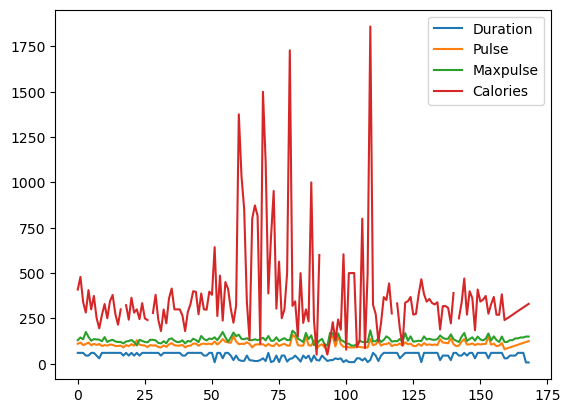

In [66]:
# Plotting:
# plt() method in pandas plots a graph
csv_df.plot() #Line chart is default kind of chart for plot() and it does not require x and y mandatory

<Axes: xlabel='Duration', ylabel='Calories'>

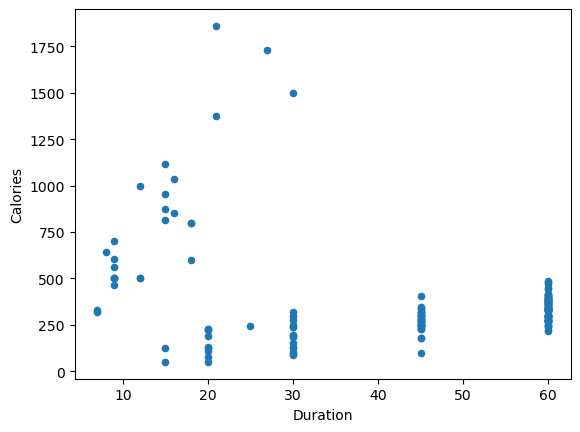

In [56]:
# kind, x, y: using kind argument we can specify the kind of graph like scatter, hist etc... and to define x and y axis we have x, y
csv_df.plot(kind='scatter',x='Duration',y='Calories')

<Axes: xlabel='Duration', ylabel='Pulse'>

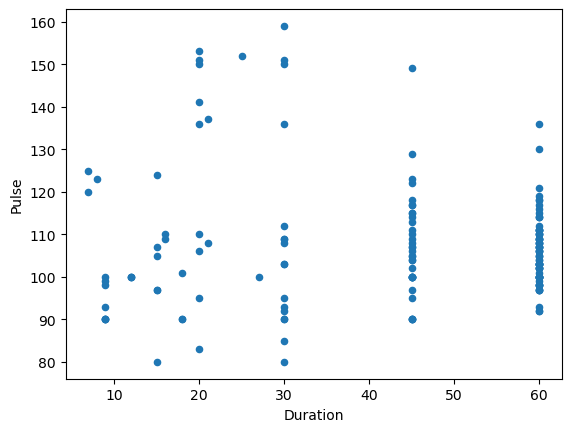

In [60]:
csv_df.plot(kind='scatter',x='Duration',y='Pulse')

<Axes: xlabel='Maxpulse', ylabel='Pulse'>

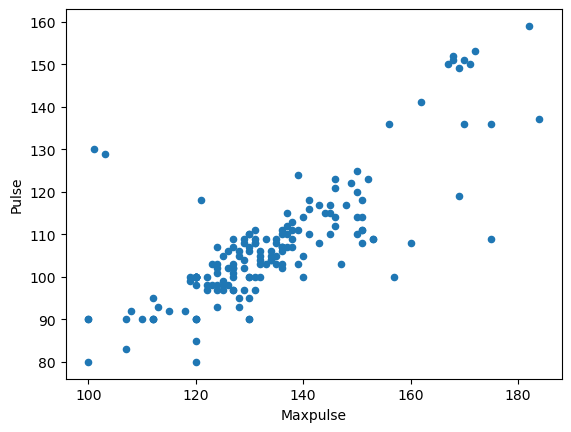

In [62]:
csv_df.plot(kind='scatter',x='Maxpulse',y='Pulse')

<Axes: ylabel='Frequency'>

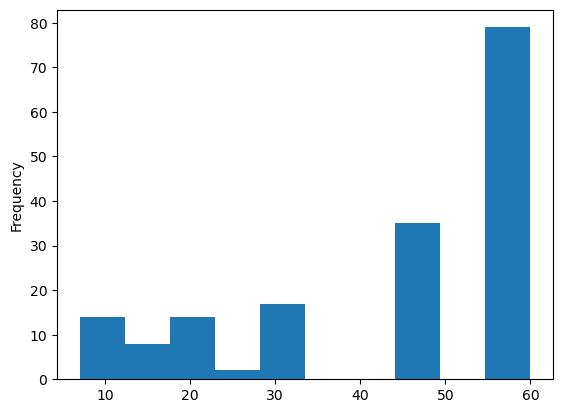

In [63]:
# A histogram needs only one column.
# A histogram shows us the frequency of each interval
csv_df['Duration'].plot(kind='hist')